# Problem 1: Code simulated annealing - Homework

Code up a simple simulated annealing to find the minimum of $f(x) = x^3 -9x^2 - 48x +52$ on the interval [-5,12]. Note that the interval is necessary since a cubic diverges to $-\infty$ on one side. First plot this function versus $x$ on this interval so you can see its structure (you'll easily see the true global minimum). 

Now, implement the following probabilistic sampling algorithm. In order to specify an algorithm you need three things: 1) To specify how you will choose your next point to sample and 2) specify a probabilstic rule to determine whether to keep that sample, and a (3) schedule for lowering the temperature over time. For (1), use a sampler that randomly chooses a new test point in an interval of size 10% of the interval size centered on your current point. For (2) use the standard Boltzmann rule for producing a probability 

$$ P(S_{old} , S_{new}) = \exp \left(-\frac{(E_{new} - E_{old})}{T} \right) $$

where $P = 1$ in cases where the new state is more favoured. For a learning schedule use

$$ T(n) = T_0 \left(1 - \frac{n}{N} \right) + 0.01 $$

where $n$ is the index of current parameter update iteration and $N$ (at least 1000) is the total number of iterations being performed. Here $T_0$ sets the temperature scale. It is somewhat aking to the Boltzmann contstant in the Boltzmann distribution. Try different values such as $T_0 = 1, 10, 20, 50$. Also try different initializations for $x$ such as $x = -3, 1, 4$.

In what cases does this algorithm converge to the "global" minimum of this function? What happens when the temperature scale is low or high? What happens when you start the algorithm near the global min versus near an alternative local min?

x:  [8.00007246]
F(x):  [-395.99999992]


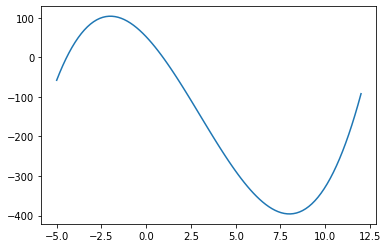

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import rand

N = 1000 # total number of iterations
Ti = 1 # initial temperature
bounds = np.asarray([[-5.0, 12.0]])
xi = 4 # try -3, 1 4


def func(x):
    return (x**3 - 9*x**2 - 48*x + 52)
          
x = np.linspace(-5,12,100)
# Plot the function vs x

plt.plot(x,func(x))

# Code simple simulated annealing to find minimum of function

# annealing temperature schedule
def temp(n,N,Ti):
    return Ti*(1- n/N) + 0.01

# probability
def boltzmann(Enew, Eold, T):
    return np.exp(-(Enew-Eold)/T)



old, old_eval = xi, func(xi)
best, best_eval = old, old_eval

for i in range(N):
# take a step
    new = old + randn(len(bounds)) * 0.1
    new_eval = func(new)
    
     # check for new best solution
    if new_eval < best_eval:
    # store new best point
        best, best_eval = new, new_eval
        # calculate energy and temp
        T = temp(i, N, Ti)
        P = boltzmann(new_eval,old_eval,T)
        
        # keep or toss new point based on probability
        if new_eval - old_eval < 0 or rand() < P:
            old, old_eval = new, new_eval # keep
            
            
print("x: ", best)
print("F(x): ", best_eval)

*********************
When x = 1 or 4 the algorithm converges to the global minimum. When x = -3, the algorithm does not converge on the global minimum.
The temperature did not seem to have an effect on converging.
When you start the algorithm near a local min/mac, it does not converge to the global minimum.

In [38]:
# Initialize all pre-built functions
#This cell sets up basic plotting functions we will use to visualize the gradient descent routines.

#Make plots interactive
#%matplotlib notebook

#Make plots static
%matplotlib inline

#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest

#Import Numpy
import numpy as np

#Define function for plotting 

def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-2, 2)
    
    plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

def plot_gd_cost(ax,gd,obj_fun, color='k'):
    
    x = gd[:,0]
    y = gd[:,1]
    cost_keep = np.zeros(len(x))

    for i in range(len(x)):
        xt = x[i]
        yt = y[i]
        cost = obj_fun(xt,yt)
        cost_keep[i] = cost

    ax.plot(cost_keep,color=color)
        
    return cost_keep;


# Plot cost function for Beales
def plot_gd_cost_beales(ax,gd,obj_fun, color='k'):
    
    x = gd[:,0]
    y = gd[:,1]
    cost_keep = np.zeros(len(x))

    for i in range(len(x)):
        xt = x[i]
        yt = y[i]
        cost = obj_fun(xt,yt)
        cost_keep[i] = cost

    ax.plot(cost_keep,color=color)
        
    return cost_keep


# Plot cost function for Rastrigin
def plot_gd_cost_rastrigin(ax,gd,obj_fun, color='k'):
    
    x = gd[:,0]
    y = gd[:,1]
    cost_keep = np.zeros(len(x))

    for i in range(len(x)):
        xt = x[i]
        yt = y[i]
        cost = obj_fun(xt,yt)
        cost_keep[i] = cost

    ax.plot(cost_keep,color=color)
        
    return cost_keep

#This writes a simple gradient descent, gradient descent+ momentum,
#nesterov. 

#Mean-gradient based methods
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

################################################################################
# Optimization functions that utilize first and second moments of gradient: RMS-PROP and ADAMS
################################################################################

def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
                        
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

################################################################################
# Use PSO from pyswarms to apply to the Beales function
################################################################################

import pyswarms as ps
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher


################################################################################
# Use Differential evolution from scipy to apply to the Beales function.
################################################################################
from scipy.optimize import differential_evolution


################################################################################
# Use basinhopping from scipy, which is a generalization of simulated annealing.
# Note that the argument T is the acceptance temperature. Try it with T = 0, 0.01, 0.1, 0.5, etc. 
# and see what happens. You'll have to read the output to figure out what is going on.
# In this output, lowest_f tells you about the cost function (0 is the minimum)
################################################################################
from scipy.optimize import basinhopping



# Rastrigin function

In [63]:
# Rastrigin

def rastrigin_function(x,y):
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20
def grad_rastrigin_function(params):
    x=params[0]
    y=params[1]
    grad_x=2 * x + 10 * 2 * np.pi * np.sin(2 * np.pi * x)
    grad_y=2 * y + 10 * 2 * np.pi * np.sin(2 * np.pi * y)
    return [grad_x,grad_y]
def contour_rastrigin_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=rastrigin_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'y*', markersize=18)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    return fig,ax

In [64]:
def rastrigin_function_callable(in1):
    x=in1[:,0]
    y=in1[:,1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

init_pos = 10*np.random.rand(10,2)-5

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options , init_pos = init_pos)

# Perform optimization
best_cost, best_pos = optimizer.optimize(rastrigin_function_callable, iters=1000)

# Differential evolution

def rastrigin_function_de(in1):
    x=in1[0]
    y=in1[1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20

bounds = [(-10,10) , (-10,10)]
de_out = differential_evolution(rastrigin_function_de , bounds , init = 'latinhypercube' , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

# Basin hopping

x0 = [-2,-3]
de_out = basinhopping(rastrigin_function_de , x0 = x0 , T = 1 , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

2021-02-27 16:23:08,608 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|1000/1000, best_cost=0
2021-02-27 16:23:09,185 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [2.86376600e-09 6.09807715e-10]


Converged Cost = 0.0
Converged params = [-6.85895785e-12  7.29469818e-10]
Num iterations = 64
Converged Cost = 3.552713678800501e-15
Converged params = [-3.43761872e-09  2.41163978e-09]
Num iterations = 100


[ 1.83919554e-09 -3.67380406e-10 -6.73709580e-10 -3.24235003e-10
  1.62402772e-09 -2.44855540e-09 -6.78787136e-10 -2.21396289e-09
 -2.65971503e-09 -2.72220023e-09] [ 9.09064329e-10  8.55682347e-10 -2.79703610e-10  2.10084068e-09
  2.15344723e-10  9.42564313e-11  1.34925213e-09  1.01691580e-09
  1.07668061e-09  1.14344147e-09] ko


<ipython-input-63-c25ba279c9d3>:17: UserWarning: Log scale: values of z <= 0 have been masked
  cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")


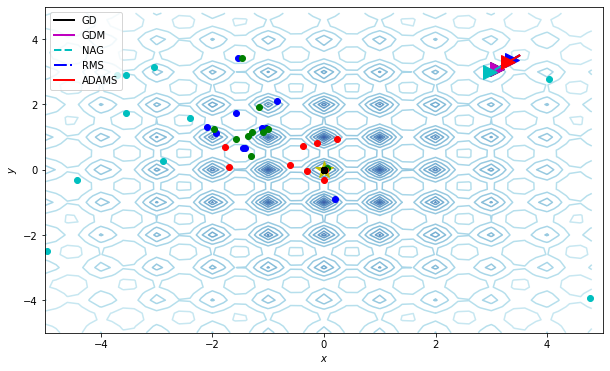

In [65]:
# Rastrigin

Nsteps=10**2
lr_l=10**-3
lr_s=10**-4
init1=np.array([3.5,3.5])
fig1, ax1=contour_rastrigin_function()
gd_trajectory1=gd(grad_rastrigin_function,init1,Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_rastrigin_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory1=NAG(grad_rastrigin_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_rastrigin_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory1=adams(grad_rastrigin_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')
plt.legend(loc=2)

ind = 0
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'co')

ind = 10
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'bo')

ind = 20
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'go')


ind = 50
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ro')


ind = -1
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ko')

print(optimizer.pos_history[-1][:,0],optimizer.pos_history[-1][:,1],'ko')

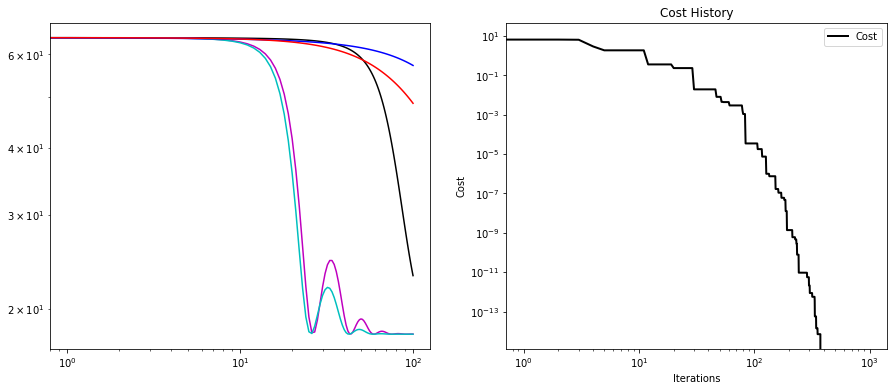

In [46]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 2 , figsize=(15, 6))


cost_tot = plot_gd_cost_rastrigin(ax1[0],gd_trajectory1,obj_fun = rastrigin_function,color='k')
cost_tot = plot_gd_cost_rastrigin(ax1[0],gdm_trajectory1,obj_fun = rastrigin_function,color='m')
cost_tot = plot_gd_cost_rastrigin(ax1[0],NAG_trajectory1,obj_fun = rastrigin_function,color='c')
cost_tot = plot_gd_cost_rastrigin(ax1[0],rms_prop_trajectory1,obj_fun = rastrigin_function,color='b')
cost_tot = plot_gd_cost_rastrigin(ax1[0],adam_trajectory1,obj_fun = rastrigin_function,color='r')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

plot_cost_history(cost_history=optimizer.cost_history,ax=ax1[1])
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')

For the rastrigin function, the gradient descent methods did not do a good job of estimating the minimum. The particle methods (PSO) however, did a much better job at getting close to the minimum. 

# Levi function

In [58]:
# Levi
def levi_function(x,y):
    return (np.sin(3 * np.pi * x) ** 2 + (x-1) ** 2 * (1+ np.sin(3 * np.pi * y)) + \
           (y - 1) ** 2 * (1 + np.sin(2 * np.pi * y)))
def grad_levi_function(params):
    x=params[0]
    y=params[1]
    grad_x= 6*np.pi*np.sin(3*np.pi*x)*np.cos(3*np.pi*x) + (2*np.cos(3*np.pi*y)**2)*(x-1) 
    grad_y= 4*np.pi*np.sin(2*np.pi*y)*np.cos(2*np.pi*y)*(y-1)**2 + 2*(y-1)*(np.sin(2*np.pi*y)**2 + 1) - \
            6*np.pi*np.cos(3*np.pi*y)*np.sin(3*np.pi*y)*(x-1)**2
    return [grad_x,grad_y]
def contour_levi_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-10, 10, 0.2), np.arange(-10, 10, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=levi_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(1,1, 'y*', markersize=18)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    return fig,ax

In [54]:
def levi_function_callable(in1):
    x=in1[:,0]
    y=in1[:,1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

init_pos = 10*np.random.rand(10,2)-5

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options , init_pos = init_pos)

# Perform optimization
best_cost, best_pos = optimizer.optimize(levi_function_callable, iters=1000)

# Differential evolution

def levi_function_de(in1):
    x=in1[0]
    y=in1[1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20

bounds = [(-10,10) , (-10,10)]
de_out = differential_evolution(levi_function_de , bounds , init = 'latinhypercube' , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

# Basin hopping

x0 = [-2,-3]
de_out = basinhopping(levi_function_de , x0 = x0 , T = 1 , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

2021-02-27 16:09:41,997 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|1000/1000, best_cost=0
2021-02-27 16:09:42,580 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-3.53090368e-09 -1.39000698e-09]


Converged Cost = 0.0
Converged params = [ 3.70894426e-10 -4.19526636e-10]
Num iterations = 67
Converged Cost = 7.105427357601002e-15
Converged params = [-6.76287632e-09 -3.20079143e-10]
Num iterations = 100


[-8.08138216e-10 -7.94819522e-10 -9.10982698e-10  9.41231073e-10
  1.46466080e-09 -4.16249341e-10 -7.92241410e-10 -1.30037940e-09
 -2.09431504e-09 -1.12900475e-09] [-0.99495864 -0.99495864 -0.99495864 -0.99495864 -0.99495864 -0.99495864
 -0.99495864 -0.99495864 -0.99495864 -0.99495864] ko


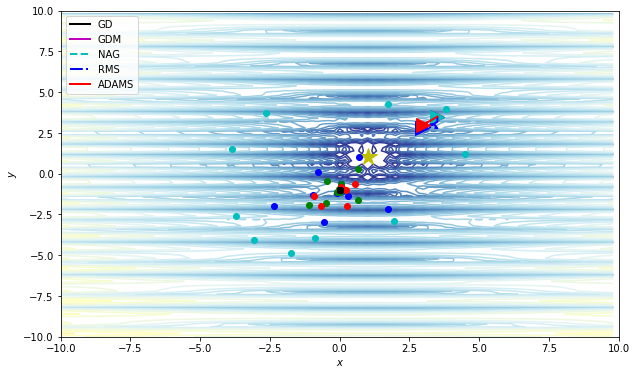

In [62]:

# Levi
Nsteps=10**2
lr_l=10**-1
lr_s=10**-6
init1=np.array([3.5,3.5])
fig1, ax1=contour_levi_function()
gd_trajectory1=gd(grad_levi_function,init1,Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_levi_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory1=NAG(grad_levi_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_levi_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory1=adams(grad_rastrigin_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')
plt.legend(loc=2)


ind = 0
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'co')

ind = 10
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'bo')

ind = 20
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'go')


ind = 50
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ro')


ind = -1
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ko')

print(optimizer.pos_history[-1][:,0],optimizer.pos_history[-1][:,1],'ko')

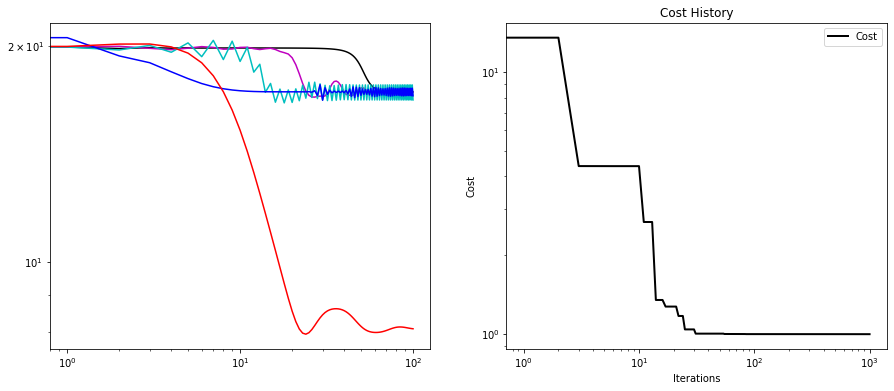

In [35]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 2 , figsize=(15, 6))


cost_tot = plot_gd_cost(ax1[0],gd_trajectory1,obj_fun = levi_function,color='k')
cost_tot = plot_gd_cost(ax1[0],gdm_trajectory1,obj_fun = levi_function,color='m')
cost_tot = plot_gd_cost(ax1[0],NAG_trajectory1,obj_fun = levi_function,color='c')
cost_tot = plot_gd_cost(ax1[0],rms_prop_trajectory1,obj_fun = levi_function,color='b')
cost_tot = plot_gd_cost(ax1[0],adam_trajectory1,obj_fun = levi_function,color='r')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

plot_cost_history(cost_history=optimizer.cost_history,ax=ax1[1])
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')


For the Levi function, it is pretty hard to tell which method works best. None of the methods were very close to the minimum and the methods look like they are about the same distance away.

# Three hump camel

In [21]:
# Three hump camel
def THC_function(x,y):
    return (2*x**2 - 1.05*x**4 + (x**6)/6 + x*y + y**2)
def grad_THC_function(params):
    x=params[0]
    y=params[1]
    grad_x= x**5 - 4.2 * x**3 + 4 * x + y
    grad_y= x + 2 * y
    return [grad_x,grad_y]
def contour_THC_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=THC_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'y*', markersize=18)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    return fig,ax


In [22]:
def THC_function_callable(in1):
    x=in1[:,0]
    y=in1[:,1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

init_pos = 10*np.random.rand(10,2)-5

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options , init_pos = init_pos)

# Perform optimization
best_cost, best_pos = optimizer.optimize(THC_function_callable, iters=1000)

# Differential evolution

def THC_function_de(in1):
    x=in1[0]
    y=in1[1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20

bounds = [(-10,10) , (-10,10)]
de_out = differential_evolution(THC_function_de , bounds , init = 'latinhypercube' , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

# Basin hopping

x0 = [-2,-3]
de_out = basinhopping(THC_function_de , x0 = x0 , T = 1 , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

2021-02-27 15:45:47,174 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|1000/1000, best_cost=0
2021-02-27 15:45:47,749 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-2.69144945e-09  1.91237552e-10]


Converged Cost = 0.0
Converged params = [7.97264477e-10 4.87196949e-10]
Num iterations = 64
Converged Cost = 3.552713678800501e-15
Converged params = [4.24840418e-09 1.00270621e-09]
Num iterations = 100


[ 1.83919554e-09 -3.67380406e-10 -6.73709580e-10 -3.24235003e-10
  1.62402772e-09 -2.44855540e-09 -6.78787136e-10 -2.21396289e-09
 -2.65971503e-09 -2.72220023e-09] [ 9.09064329e-10  8.55682347e-10 -2.79703610e-10  2.10084068e-09
  2.15344723e-10  9.42564313e-11  1.34925213e-09  1.01691580e-09
  1.07668061e-09  1.14344147e-09] ko


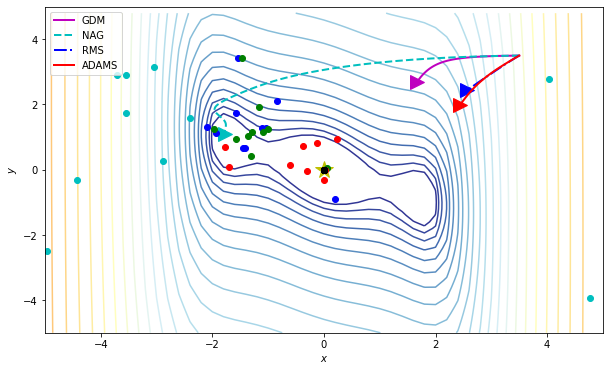

In [66]:
Nsteps=10**2
lr_l=10**-2
lr_s=10**-3
init1=np.array([3.5,3.5])
fig1, ax1=contour_THC_function()
gd_trajectory1=gd(grad_THC_function,init1,Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_THC_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory1=NAG(grad_THC_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_THC_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory1=adams(grad_THC_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
# overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')
plt.legend(loc=2)

ind = 0
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'co')

ind = 10
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'bo')

ind = 20
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'go')


ind = 50
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ro')


ind = -1
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ko')

print(optimizer.pos_history[-1][:,0],optimizer.pos_history[-1][:,1],'ko')

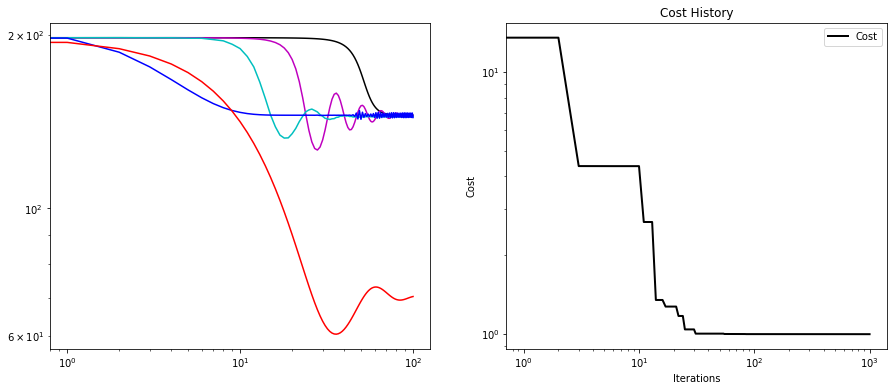

In [36]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 2 , figsize=(15, 6))


cost_tot = plot_gd_cost(ax1[0],gd_trajectory1,obj_fun = THC_function,color='k')
cost_tot = plot_gd_cost(ax1[0],gdm_trajectory1,obj_fun = THC_function,color='m')
cost_tot = plot_gd_cost(ax1[0],NAG_trajectory1,obj_fun = THC_function,color='c')
cost_tot = plot_gd_cost(ax1[0],rms_prop_trajectory1,obj_fun = THC_function,color='b')
cost_tot = plot_gd_cost(ax1[0],adam_trajectory1,obj_fun = THC_function,color='r')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

plot_cost_history(cost_history=optimizer.cost_history,ax=ax1[1])
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')


For the three hump camel function, the gradient descent methods did not do a good job of estimating the minimum. The particle methods (PSO) however, did a much better job at getting close to the minimum.

# Matyas function

In [24]:
# Matyas function
def matyas_function(x,y):
    return (0.26*(x**2 + y**2) - 0.48*x*y)
def grad_matyas_function(params):
    x=params[0]
    y=params[1]
    grad_x= 0.52*x - 0.48*y
    grad_y= 0.52*y - 0.48*x
    return [grad_x,grad_y]
def contour_matyas_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-10, 10, 0.2), np.arange(-10, 10, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=matyas_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'y*', markersize=18)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((-10, 10))
    ax.set_ylim((-10, 10))
    return fig,ax

In [25]:
def matyas_function_callable(in1):
    x=in1[:,0]
    y=in1[:,1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

init_pos = 10*np.random.rand(10,2)-5

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options , init_pos = init_pos)

# Perform optimization
best_cost, best_pos = optimizer.optimize(matyas_function_callable, iters=1000)

# Differential evolution

def matyas_function_de(in1):
    x=in1[0]
    y=in1[1]
    return (x ** 2 - 10 * np.cos(2 * np.pi * x)) + \
           (y ** 2 - 10 * np.cos(2 * np.pi * y)) + 20

bounds = [(-10,10) , (-10,10)]
de_out = differential_evolution(matyas_function_de , bounds , init = 'latinhypercube' , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

# Basin hopping

x0 = [-2,-3]
de_out = basinhopping(matyas_function_de , x0 = x0 , T = 1 , disp = False)

print('Converged Cost = ' + str(de_out.fun))
print('Converged params = ' + str(de_out.x))
print('Num iterations = ' + str(de_out.nit))

2021-02-27 15:46:01,204 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.995
2021-02-27 15:46:01,778 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9949590570932898, best pos: [-1.02993175e-09  9.94958637e-01]


Converged Cost = 0.0
Converged params = [-7.02446989e-10  2.19100293e-10]
Num iterations = 69
Converged Cost = 1.4210854715202004e-14
Converged params = [-4.34135733e-09 -7.36078667e-09]
Num iterations = 100


[ 1.83919554e-09 -3.67380406e-10 -6.73709580e-10 -3.24235003e-10
  1.62402772e-09 -2.44855540e-09 -6.78787136e-10 -2.21396289e-09
 -2.65971503e-09 -2.72220023e-09] [ 9.09064329e-10  8.55682347e-10 -2.79703610e-10  2.10084068e-09
  2.15344723e-10  9.42564313e-11  1.34925213e-09  1.01691580e-09
  1.07668061e-09  1.14344147e-09] ko


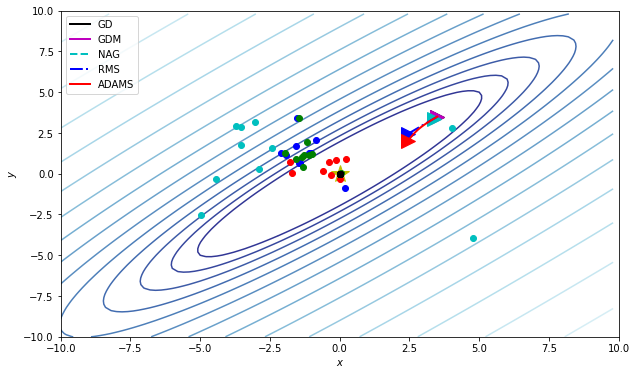

In [67]:
Nsteps=10**2
lr_l=10**-2
lr_s=10**-3
init1=np.array([3.5,3.5])

fig1, ax1=contour_matyas_function()
gd_trajectory1=gd(grad_matyas_function,init1,Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_matyas_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory1=NAG(grad_matyas_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_matyas_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory1=adams(grad_THC_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')
plt.legend(loc=2)

ind = 0
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'co')

ind = 10
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'bo')

ind = 20
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'go')


ind = 50
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ro')


ind = -1
ax1.plot(optimizer.pos_history[ind][:,0],optimizer.pos_history[ind][:,1],'ko')

print(optimizer.pos_history[-1][:,0],optimizer.pos_history[-1][:,1],'ko')

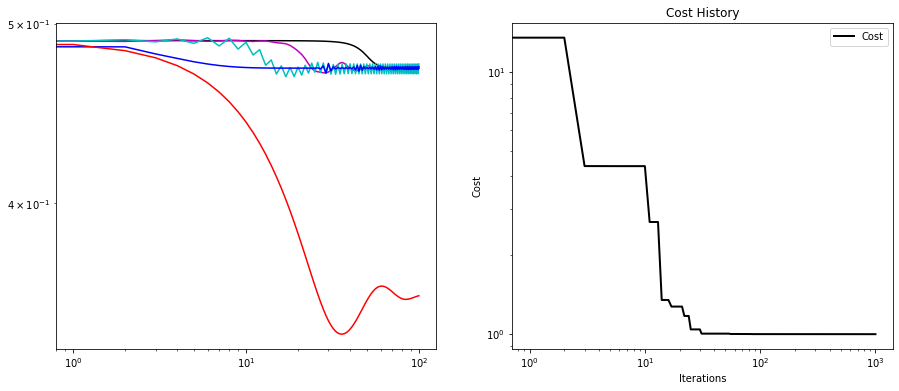

In [37]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 2 , figsize=(15, 6))


cost_tot = plot_gd_cost(ax1[0],gd_trajectory1,obj_fun = matyas_function,color='k')
cost_tot = plot_gd_cost(ax1[0],gdm_trajectory1,obj_fun = matyas_function,color='m')
cost_tot = plot_gd_cost(ax1[0],NAG_trajectory1,obj_fun = matyas_function,color='c')
cost_tot = plot_gd_cost(ax1[0],rms_prop_trajectory1,obj_fun = matyas_function,color='b')
cost_tot = plot_gd_cost(ax1[0],adam_trajectory1,obj_fun = matyas_function,color='r')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

plot_cost_history(cost_history=optimizer.cost_history,ax=ax1[1])
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')

For the matyas function, the gradient descent methods did not do a good job of estimating the minimum. The particle methods (PSO) however, did a much better job at getting close to the minimum.

# End of Assignment Metacognition questions.

Briefly answer these two questions. A few sentences or more is sufficient on each.

1) What did you learn as part of this assignment (hopefully something)? Be more specific than usual here. You applied lots of different methods with different learning rates and so forth to different types of optimization problems. Does a particular type of method seem to perform better on one type than another? 

2) What questions do you still have or is there something you still don't grasp? 

If you understand everything, already knew all of this, did not learn anything new, and don't have any questions, great! Instead of answering the above questions, instead write me a new question (with full solutions) that you think would help illustrate one or more of the points above.

***************
1) I learned what the different methods of optimization are and it seems that the particle methods perform better in general compared to the gradient descent types. But this might change with different initial parameters. I also learned how to simulate annealing and use this to find the minimum of a function. I had an idea of what annealing does in a more practical sense but not in the computational sense to find a minimum or for optimization.
2) I still don't quite grasp how each of the methods for optimization work, so that will require more reading to fully understand that.